In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import random

import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

import keras
import keras.backend as K 
from keras.layers import Dense, LSTM  
import kerastuner as kt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dropout, BatchNormalization
from keras.models import Sequential 
from tensorflow.keras import layers


In [2]:
# Augmentation
path = 'D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/VT3_Augmentation_Final.xlsx'

x = 'Sheet0'
df = pd.read_excel(path, sheet_name = x, header = 0)
df = df.drop(['Unnamed: 0'], axis=1)
df.shape

x=df.copy()
y_obj=x.pop("Bending")

# 전체 데이터에서 학습 데이터와 테스트 데이터(0.2)로 구분
x_train1, x_test, y_train1, y_test = train_test_split(x, y_obj, test_size=0.2,shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔

## 학습 셋에서 학습과 검증 데이터(0.2)로 구분
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)  ## shuffle=True로 하면 데이터를 섞어


In [3]:
x_train.shape

(9120, 84)

In [3]:
def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
#결과 그래프
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(20,16))
 
    plt.subplot(2,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.legend()
    
    
    plt.subplot(2,2,2)
    plt.xlabel('Epoch')
    #plt.ylabel('Mean Abs Error [MPG]')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()

    plt.subplot(2,2,3)
    plt.xlabel('Epoch')
    #plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    
    
    plt.subplot(2,2,4)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Percent Error ')
    plt.plot(hist['epoch'], hist['mape'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mape'],
           label = 'Val Error')
    plt.legend()
    
    plt.rc('axes',labelsize = 20)
    plt.rc('font',size = 15)
    plt.show()

MLP
RNN - 시계열 데이터
CNN - 이미지
efficientnet resnet 
cefn - efficient net
crn - res net


In [5]:

def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse', 'mape']) # accuracy, precision, F1 
    return model

#K.clear_session()
model = build_model()
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=0)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10880     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [7]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 100
'''
9120
80 : 20
9120 * 0.8 = train 
train / 32 = 228 
32 * 228 = 1 epochs
100 회반복
'''
train - validation - test
과적합 overfitting 

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS, batch_size = 16, validation_split = 0.2, verbose=1,
    callbacks=[PrintDot()])


score = model.evaluate(x_test, y_test, verbose=1)
print(model.metrics_names)
print(score)

# train history dataframe 생성
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/100
456/456 [==============================] - 2s 5ms/step - loss: 64.2793 - mae: 6.3714 - mse: 64.2793 - mape: 239.9463 - val_loss: 23.7370 - val_mae: 4.8165 - val_mse: 23.7370 - val_mape: 177.1876
Epoch 2/100
456/456 [==============================] - 2s 5ms/step - loss: 58.4593 - mae: 6.1326 - mse: 58.4593 - mape: 229.9308 - val_loss: 399.4498 - val_mae: 19.9688 - val_mse: 399.4498 - val_mape: 763.9214
Epoch 3/100
456/456 [==============================] - 2s 3ms/step - loss: 57.2149 - mae: 5.5174 - mse: 57.2149 - mape: 207.4788 - val_loss: 33.7030 - val_mae: 5.7561 - val_mse: 33.7030 - val_mape: 212.4648
Epoch 4/100
456/456 [==============================] - 2s 4ms/step - loss: 63.0445 - mae: 6.1800 - mse: 63.0445 - mape: 232.8529 - val_loss: 5.7135 - val_mae: 2.2778 - val_mse: 5.7135 - val_mape: 80.2547
Epoch 5/100
456/456 [==============================] - 2s 4ms/step - loss: 57.6926 - mae: 5.8043 - mse: 57.6926 - mape: 219.5998 - val_loss: 120.6994 - val_mae: 10.9578 - v

Epoch 40/100
456/456 [==============================] - 2s 4ms/step - loss: 45.4695 - mae: 5.0624 - mse: 45.4695 - mape: 191.2565 - val_loss: 49.0417 - val_mae: 6.9675 - val_mse: 49.0417 - val_mape: 259.1914
Epoch 41/100
456/456 [==============================] - 2s 4ms/step - loss: 39.6110 - mae: 4.9407 - mse: 39.6110 - mape: 186.3817 - val_loss: 216.1861 - val_mae: 14.6854 - val_mse: 216.1861 - val_mape: 563.2730
Epoch 42/100
456/456 [==============================] - 1s 3ms/step - loss: 44.3536 - mae: 5.3280 - mse: 44.3536 - mape: 199.5333 - val_loss: 20.7064 - val_mae: 4.4935 - val_mse: 20.7064 - val_mape: 164.9601
Epoch 43/100
456/456 [==============================] - 1s 3ms/step - loss: 39.7802 - mae: 4.9759 - mse: 39.7802 - mape: 187.4245 - val_loss: 4.5989 - val_mae: 2.0379 - val_mse: 4.5989 - val_mape: 83.0407
Epoch 44/100
456/456 [==============================] - 2s 3ms/step - loss: 42.4993 - mae: 4.9342 - mse: 42.4993 - mape: 186.1814 - val_loss: 7.3554 - val_mae: 2.6275 -

456/456 [==============================] - 1s 3ms/step - loss: 37.0592 - mae: 4.9741 - mse: 37.0592 - mape: 185.7602 - val_loss: 18.5595 - val_mae: 4.2526 - val_mse: 18.5595 - val_mape: 167.2650
Epoch 80/100
456/456 [==============================] - 1s 3ms/step - loss: 29.4864 - mae: 4.1591 - mse: 29.4864 - mape: 156.5230 - val_loss: 21.8955 - val_mae: 4.6311 - val_mse: 21.8955 - val_mape: 181.7325
Epoch 81/100
456/456 [==============================] - 1s 3ms/step - loss: 32.6216 - mae: 4.6280 - mse: 32.6216 - mape: 174.9219 - val_loss: 1.5699 - val_mae: 1.1018 - val_mse: 1.5699 - val_mape: 47.1484
Epoch 82/100
456/456 [==============================] - 1s 3ms/step - loss: 33.3241 - mae: 4.7198 - mse: 33.3241 - mape: 177.3830 - val_loss: 12.0746 - val_mae: 3.4050 - val_mse: 12.0746 - val_mape: 123.7727
Epoch 83/100
456/456 [==============================] - 1s 3ms/step - loss: 34.7845 - mae: 4.7719 - mse: 34.7845 - mape: 180.2794 - val_loss: 184.5416 - val_mae: 13.5646 - val_mse: 184

Mean Absolute Percent Error:  35.85032430861554
Mean Absolute Error:  1.085062523506615
Mean Squared Error:  1.5595339310418281
R2 score:  -1.5361903516051956


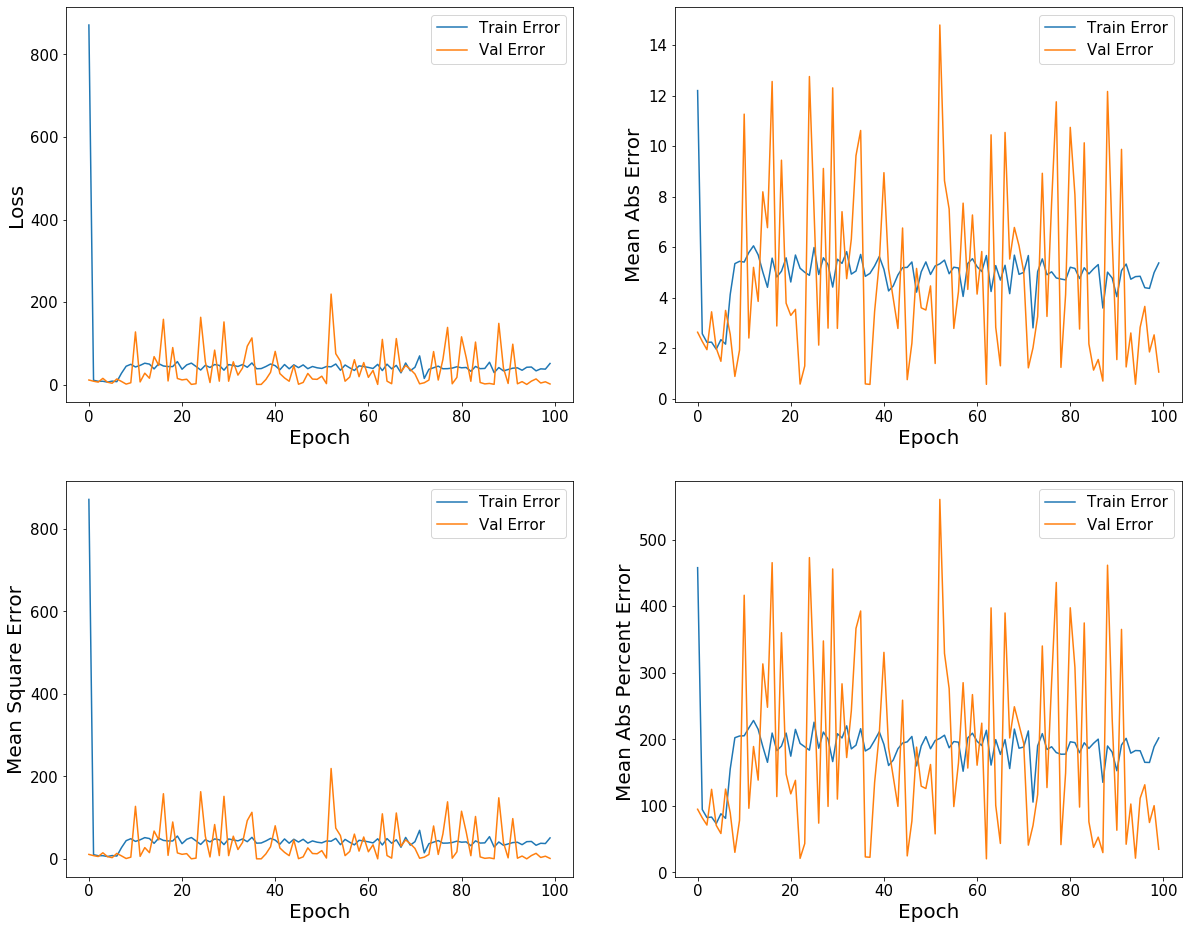

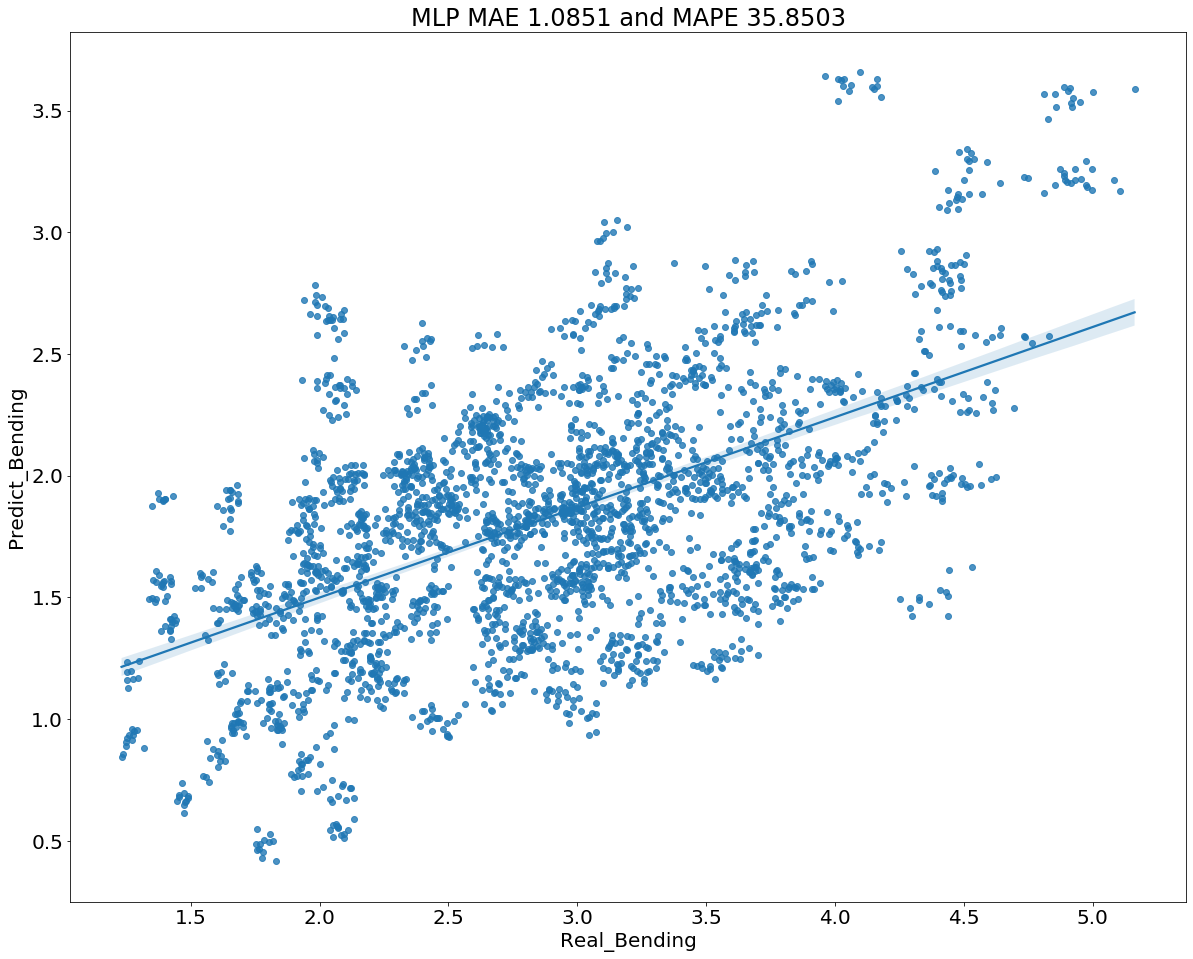

In [55]:
predict_test = model.predict(x_test, batch_size = 32)
predict_test = predict_test.ravel()

mae = MAE(y_test, predict_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
mape = MAPE(y_test, predict_test)

print('Mean Absolute Percent Error: ', mape)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 score: ', r2)

plot_history(history)

final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']

plt.rc('font',size = 20)
plt.figure(figsize = (20,16))
plt.title('MLP MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)


# LSTM Data 변경

In [6]:
scaler = MinMaxScaler()

x=df.copy()
y_obj=x.pop("Bending")
x = scaler.fit_transform(x)

print(x.shape)
x_train1, x_test, y_train1, y_test = train_test_split(x, y_obj, test_size=0.2,shuffle=True) 
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2,shuffle=True)

#from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

x_train = np.reshape(x_train, (len(x_train),1,x_train.shape[1]))
x_valid = np.reshape(x_valid, (len(x_valid),1,x_valid.shape[1]))
x_test = np.reshape(x_test, (len(x_test),1,x_test.shape[1]))
y_train = y_train.values

(14250, 84)


In [7]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
dense (Dense)                (None, 1, 1)              129       
Total params: 109,185
Trainable params: 109,185
Non-trainable params: 0
_________________________________________________________________


In [8]:
EPOCHS = 100
BATCH_SIZE = 32

filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(EPOCHS, BATCH_SIZE)
checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=0,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=25,         # 10회 Epoch동안 개선되지 않는다면 종료
                             )

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 25 == 0: print('')
        print('.', end='')

hist = model.fit(
    x_train, y_train,
    epochs=EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])
#callbacks=[checkpoint, earlystopping, PrintDot()])

print('Fin')


.........................
.........................
.........................
.........................Fin


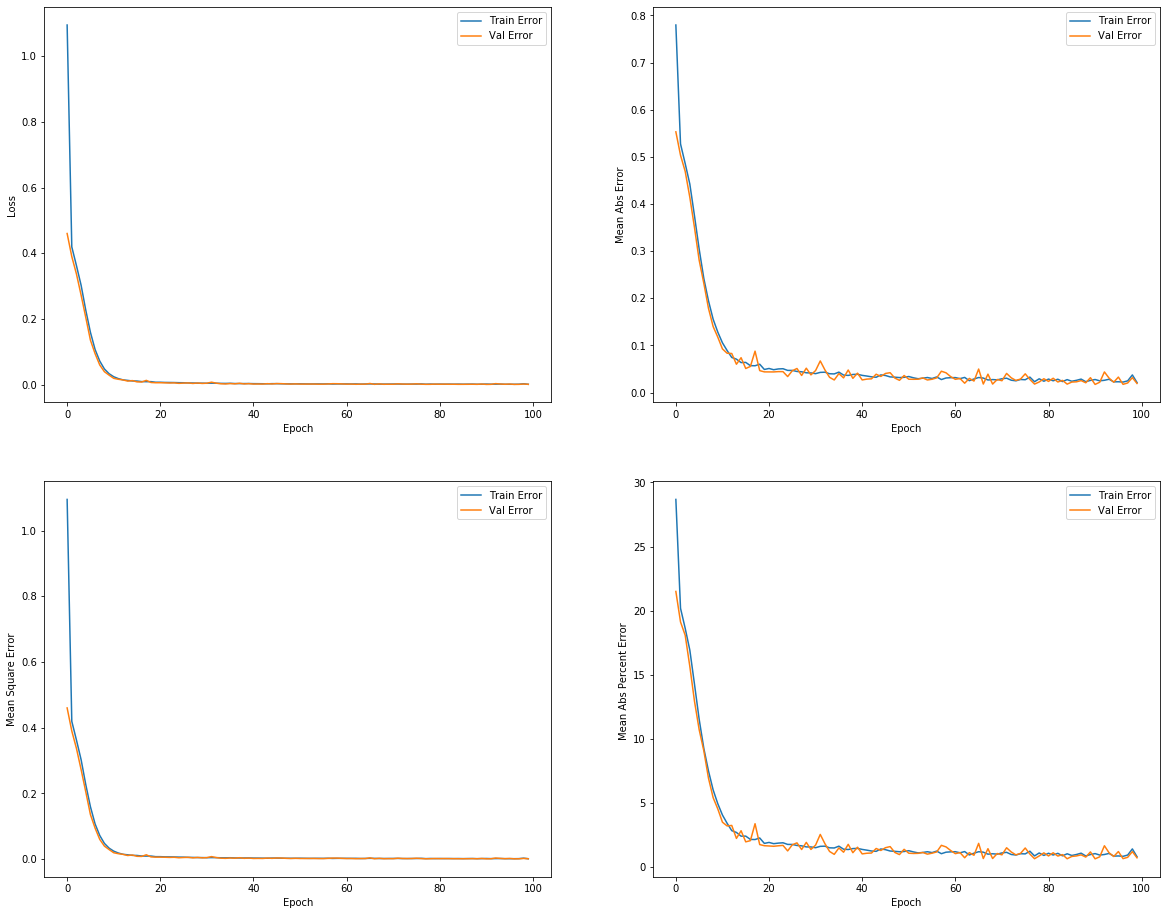

In [9]:
plot_history(hist)

MAE :  0.0202 MAPE :  0.7641 MSE :  0.0014


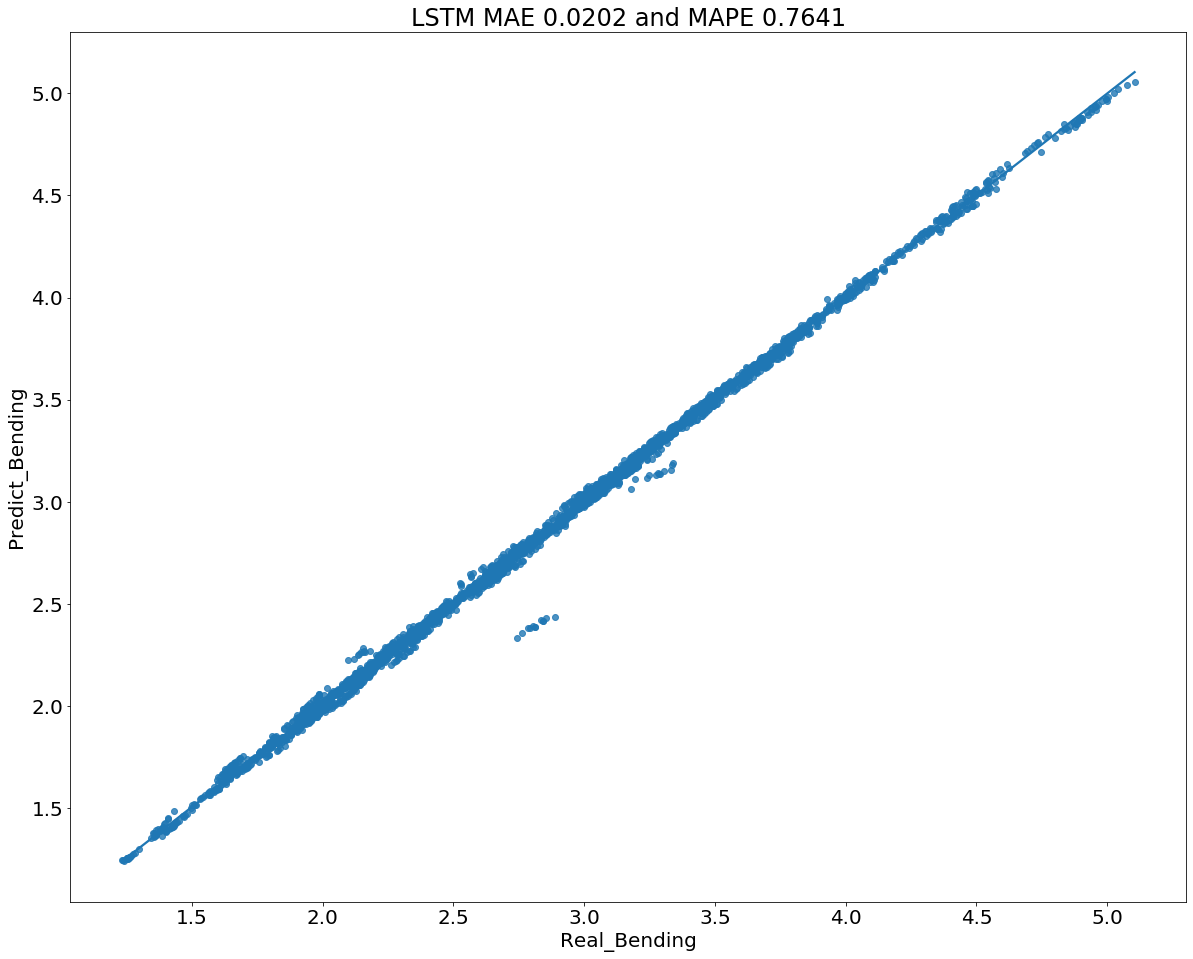

In [10]:
predict_test = model.predict(x_test, batch_size = 32)
predict_test = predict_test.reshape(predict_test.shape[0],)

mae = round(MAE(y_test, predict_test),4)
mape = round(MAPE(y_test, predict_test),4)
mse = round(mean_squared_error(y_test, predict_test),4)

print('MAE : ' ,mae, 'MAPE : ', mape, 'MSE : ', mse)


plt.figure(figsize=(20,16))
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']

plt.rc('font',size = 20)
plt.title('LSTM MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)

# LSTM 최적 모델 탐색

# 모델 생성 후 성능 Test

In [11]:
def LSTMTest(model):
    EPOCHS = 100
    BATCH_SIZE = 32

    filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(EPOCHS, BATCH_SIZE)
    checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                                 monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                                 verbose=0,            # 로그를 출력합니다
                                 save_best_only=True,  # 가장 best 값만 저장합니다
                                 mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                                )

    earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                                  patience=25,         # 10회 Epoch동안 개선되지 않는다면 종료
                                 )

    class PrintDot(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs):
            if epoch % 25 == 0: print('')
            print('.', end='')

    hist = model.fit(
        x_train, y_train,
        epochs=EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.2, verbose=0,
      #  callbacks=[PrintDot()])
        callbacks=[checkpoint, earlystopping, PrintDot()])
    print('Fin')

    predict_test = model.predict(x_test, batch_size = 32)
    predict_test = predict_test.reshape(predict_test.shape[0],)

    mae = round(MAE(y_test, predict_test),4)
    mape = round(MAPE(y_test, predict_test),4)
    mse = round(mean_squared_error(y_test, predict_test),4)

    print('MAE : ' ,mae, 'MAPE : ', mape, 'MSE : ', mse)



In [12]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))#, return_sequences= True)) # (timestep, feature)
model.add(Dense(1)) # output = 1 

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()

LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
dense (Dense)                (None, 1, 1)              129       
Total params: 109,185
Trainable params: 109,185
Non-trainable params: 0
_________________________________________________________________

.........................
.........................
.........................
.........................Fin
MAE :  0.0262 MAPE :  0.992 MSE :  0.0016


In [13]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(LSTM(64, activation = 'relu', return_sequences= True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()


LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              65        
Total params: 158,529
Trainable params: 158,529
Non-trainable params: 0
_________________________________________________________________

.........................
.........................
.........................
.........................Fin
MAE :  0.0315 MAPE :  1.1151 MSE :  0.002


In [14]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(LSTM(64, activation = 'relu', return_sequences= True))
model.add(LSTM(32, activation = 'relu', return_sequences= True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()


LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 170,913
Trainable params: 170,913
Non-trainable params: 0
_________________________________________________________________

.........................
.........................
.........................
.........................Fin
MAE :  0.0308 MAPE :  1.1093 MSE :  0.0017


In [15]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(Dropout(0.05))
model.add(LSTM(64, activation = 'relu', return_sequences= True))
model.add(LSTM(32, activation = 'relu', return_sequences= True))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()

LSTMTest(model)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
dropout (Dropout)            (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 170,913
Trainable params: 170,913
Non-trainable params: 0
_________________________________________________________________

.........................
.........................
.........................
.........................Fin
MAE :  0

In [16]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(LSTM(64, activation = 'relu', return_sequences= True))
model.add(Dropout(0.05))
model.add(LSTM(32, activation = 'relu', return_sequences= True))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()

LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 170,913
Trainable params: 170,913
Non-trainable params: 0
_________________________________________________________________

.........................
.........................
.........................
.........................Fin
MAE :  0

In [17]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(BatchNormalization())
model.add(LSTM(64, activation = 'relu', return_sequences= True))
model.add(LSTM(32, activation = 'relu', return_sequences= True))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()

LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 171,425
Trainable params: 171,169
Non-trainable params: 256
_________________________________________________________________

.........................
.........................
.........................
.........................Fin
MAE : 

In [18]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(LSTM(64, activation = 'relu', return_sequences= True))
model.add(BatchNormalization())
model.add(LSTM(32, activation = 'relu', return_sequences= True))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()

LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 171,169
Trainable params: 171,041
Non-trainable params: 128
_________________________________________________________________

.........................
.........................
.........................
.........................Fin
MAE : 

In [19]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(Dropout(0.05))
model.add(LSTM(64, activation = 'relu', return_sequences= True))
model.add(BatchNormalization())
model.add(LSTM(32, activation = 'relu', return_sequences= True))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()

LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
dropout (Dropout)            (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 64)             256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 171,169
Trainable params: 171,041
Non-trainable params: 128
________________________________________________

In [20]:
K.clear_session() 
model = Sequential()  
model.add(LSTM(128, activation = 'relu', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(BatchNormalization())
model.add(LSTM(64, activation = 'relu', return_sequences= True))
model.add(Dropout(0.05))
model.add(LSTM(32, activation = 'relu', return_sequences= True))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mae', 'mse', 'mape'])
model.summary()

LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            109056    
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 171,425
Trainable params: 171,169
Non-trainable params: 256
________________________________________________

# Keras Tuner 사용

In [150]:
def model_builder(hp):
    K.clear_session() 
    model = Sequential()  # Sequeatial Model 
    hp_units1 = hp.Choice('units1', values = [16, 32, 64, 128, 256])
    hp_learning_rate = hp.Choice('learning_rate', values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]) 
    hp_activation1 = hp.Choice('activation1', values = ['relu', 'tanh', 'sigmoid'])

    model.add(LSTM(units = hp_units1, activation = hp_activation1, input_shape=(1, x_train.shape[2]), return_sequences= True))
    model.add(Dense(1))
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = 'mse', 
                metrics = ['mae', 'mse','mape'])
    model.summary()
    
    return model


In [21]:
def model_builder(hp):
    K.clear_session() 
    model = Sequential()  # Sequeatial Model 
    hp_units1 = hp.Choice('units1', values = [32, 64, 128, 256])
    hp_units2 = hp.Choice('units2', values = [32, 64, 128, 256])
    hp_units3 = hp.Choice('units3', values = [32, 64, 128, 256])
    hp_learning_rate = hp.Choice('learning_rate', values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]) 
    hp_activation1 = hp.Choice('activation1', values = ['relu', 'tanh', 'sigmoid'])
    hp_activation2 = hp.Choice('activation2', values = ['relu', 'tanh', 'sigmoid'])
    hp_activation3 = hp.Choice('activation3', values = ['relu', 'tanh', 'sigmoid'])

    model.add(LSTM(units = hp_units1, activation = hp_activation1, input_shape=(1, x_train.shape[2]), return_sequences= True))
    model.add(BatchNormalization())
    model.add(LSTM(units = hp_units2, activation = hp_activation2, return_sequences= True))
    model.add(LSTM(units = hp_units3, activation = hp_activation3, return_sequences= True))
    model.add(Dense(1))
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = 'mse', 
                metrics = ['mae', 'mse','mape'])
    model.summary()
    
    return model


In [22]:
tuner = kt.Hyperband(model_builder,
                     objective = 'mae', 
                     max_epochs = 100,
                     factor = 3,
                     executions_per_trial=2,
                     #seed = 1207,
                     overwrite=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             14976     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 32)             128       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 31,777
Trainable params: 31,713
Non-trainable params: 64
_________________________________________________________________


In [23]:
print('Run Tuner')
tuner.search(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]


Trial 254 Complete [00h 06m 17s]
mae: 0.03462468646466732

Best mae So Far: 0.01703157275915146
Total elapsed time: 06h 00m 55s
INFO:tensorflow:Oracle triggered exit


In [24]:
K.clear_session() 
model = Sequential()
model.add(LSTM(units = best_hps.get('units1'), activation = best_hps.get('activation1'), input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(BatchNormalization())
model.add(LSTM(units = best_hps.get('units2'), activation = best_hps.get('activation2'), return_sequences= True))
model.add(LSTM(units = best_hps.get('units3'), activation = best_hps.get('activation3'), return_sequences= True))
model.add(Dense(1))

model.compile(optimizer = keras.optimizers.Adam(learning_rate = best_hps.get('learning_rate')),
            loss = 'mse', 
            metrics = ['mae', 'mse','mape'])
model.summary()

LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 256)            349184    
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 256)            1024      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             82176     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 256)            328704    
_________________________________________________________________
dense (Dense)                (None, 1, 1)              257       
Total params: 761,345
Trainable params: 760,833
Non-trainable params: 512
_________________________________________________________________

.........................
.........................
.........................
.........................Fin
MAE : 

In [151]:
tuner = kt.Hyperband(model_builder,
                     objective = 'mae', 
                     max_epochs = 100,
                     factor = 3,
                     executions_per_trial=1,
                     #seed = 1207,
                     overwrite=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 16)             6464      
_________________________________________________________________
dense (Dense)                (None, 1, 1)              17        
Total params: 6,481
Trainable params: 6,481
Non-trainable params: 0
_________________________________________________________________


In [152]:
print('Run Tuner')
tuner.search(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]


Trial 150 Complete [00h 00m 06s]
mae: 0.10621937364339828

Best mae So Far: 0.029816143214702606
Total elapsed time: 00h 17m 46s
INFO:tensorflow:Oracle triggered exit
best_hps


In [158]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='mae', direction='min')
Trial summary
Hyperparameters:
units1: 32
learning_rate: 0.05
activation1: sigmoid
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: c0bda349a68aad29315c012d1a853d63
Score: 0.029816143214702606
Trial summary
Hyperparameters:
units1: 32
learning_rate: 0.05
activation1: sigmoid
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: e7ec2e5e0b2d363c159ea6d1d6097243
Score: 0.0298934169113636
Trial summary
Hyperparameters:
units1: 64
learning_rate: 0.05
activation1: tanh
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: c7a47f1c2b90e6efb1c44a622c86e8c7
Score: 0.03558192029595375
Trial summary
Hyperparameters:
units1: 64
learning_rate: 0.05
activation1: tanh
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: e3a692939225aa1388c3691febbe

In [153]:
print('Best units1 : ', best_hps.get('units1'),
      'Best learning_rate : ', best_hps.get('learning_rate'),
      'Best hp_activation1 : ', best_hps.get('activation1'),
     )

Best units1 :  32 Best learning_rate :  0.05 Best hp_activation1 :  sigmoid


In [29]:
print('Best units1 : ', best_hps.get('units1'),
      'Best learning_rate : ', best_hps.get('learning_rate'),
      'Best hp_activation1 : ', best_hps.get('activation1'),
     )

Best units1 :  256 Best learning_rate :  0.0005 Best hp_activation1 :  relu


In [154]:
K.clear_session() 
model = Sequential()
model.add(LSTM(units = best_hps.get('units1'), activation = best_hps.get('activation1'), input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(Dense(1))

model.compile(optimizer = keras.optimizers.Adam(learning_rate = best_hps.get('learning_rate')),
            loss = 'mse', 
            metrics = ['mae', 'mse','mape'])
model.summary()

LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             14976     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 15,009
Trainable params: 15,009
Non-trainable params: 0
_________________________________________________________________

.........................
.........................
.........................
.........................Fin
MAE :  0.0498 MAPE :  1.8643 MSE :  0.0046


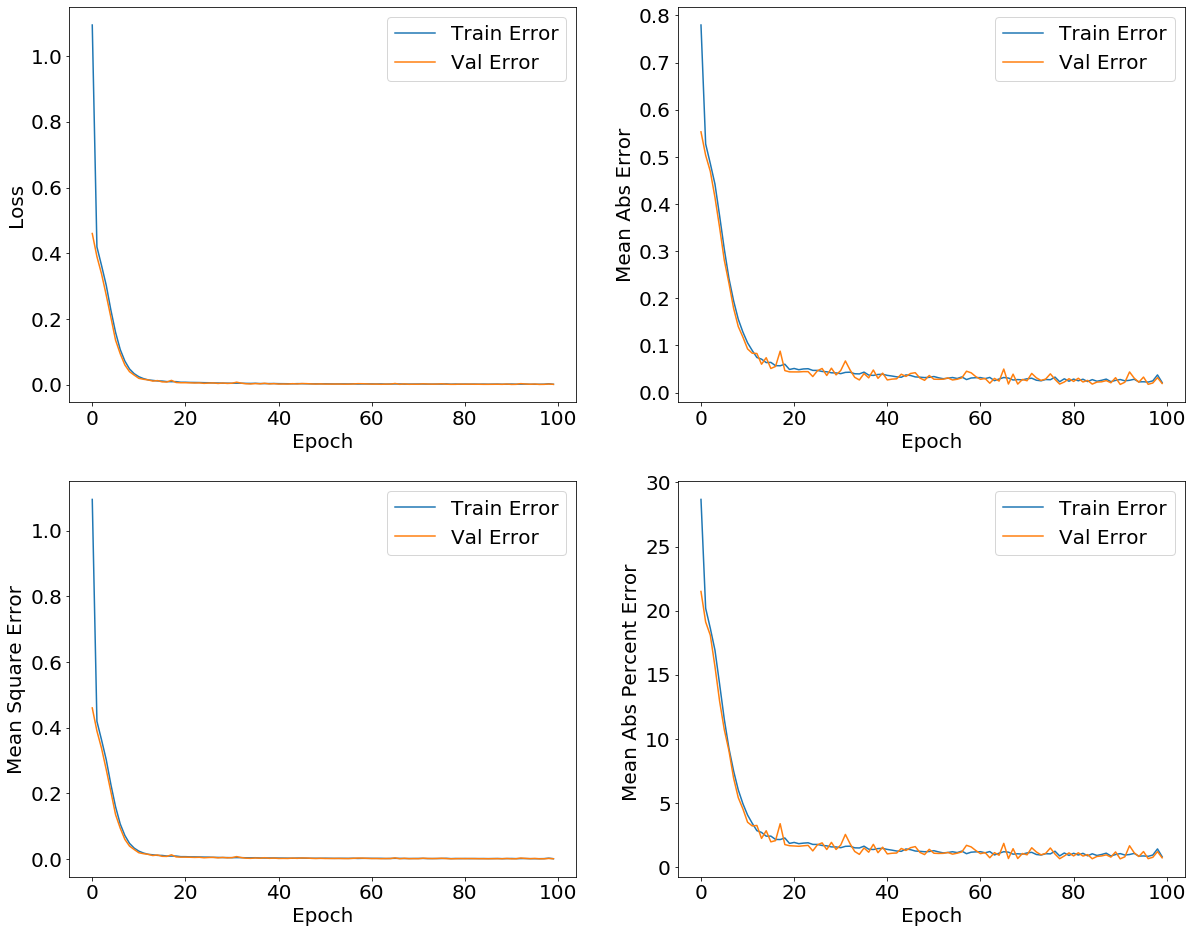

In [25]:
plot_history(hist)

MAE :  0.0144 MAPE :  0.5294 MSE :  0.0004


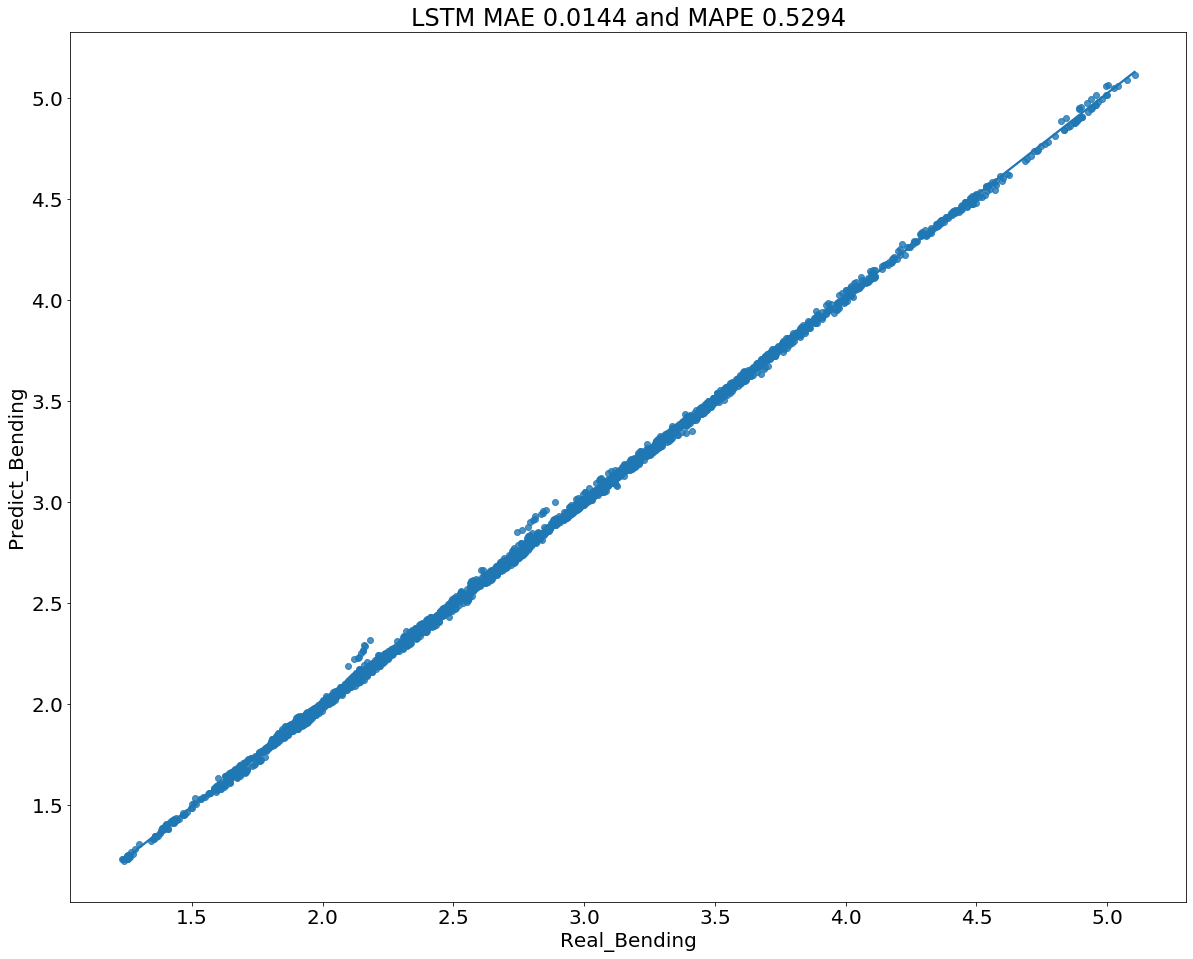

In [26]:
predict_test = model.predict(x_test, batch_size = 32)
predict_test = predict_test.reshape(predict_test.shape[0],)

mae = round(MAE(y_test, predict_test),4)
mape = round(MAPE(y_test, predict_test),4)
mse = round(mean_squared_error(y_test, predict_test),4)

print('MAE : ' ,mae, 'MAPE : ', mape, 'MSE : ', mse)


plt.figure(figsize=(20,16))
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']

plt.rc('font',size = 20)
plt.title('LSTM MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)

In [217]:
K.clear_session() 
model = Sequential()
model.add(LSTM(units =32, activation = 'sigmoid', input_shape=(1, x_train.shape[2]), return_sequences= True))
model.add(Dense(1))

model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.05),
            loss = 'mean_squared_error', 
            metrics = ['mae', 'mse','mape'])
model.summary()

LSTMTest(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             14976     
_________________________________________________________________
dense (Dense)                (None, 1, 1)              33        
Total params: 15,009
Trainable params: 15,009
Non-trainable params: 0
_________________________________________________________________

.........................
.........................
.Fin
MAE :  0.0361 MAPE :  1.3184 MSE :  0.003


In [216]:
def LSTMTest(model):
    EPOCHS = 100
    BATCH_SIZE = 32

    filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(EPOCHS, BATCH_SIZE)
    checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                                 monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                                 verbose=0,            # 로그를 출력합니다
                                 save_best_only=True,  # 가장 best 값만 저장합니다
                                 mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                                )

    earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                                  patience=25,         # 10회 Epoch동안 개선되지 않는다면 종료
                                 )

    class PrintDot(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs):
            if epoch % 25 == 0: print('')
            print('.', end='')

    hist = model.fit(
        x_train, y_train,
        epochs=EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.2, verbose=0,
      #  callbacks=[PrintDot()])
        callbacks=[checkpoint, earlystopping, PrintDot()])
    print('Fin')

    predict_test = model.predict(x_test, batch_size = 32)
    predict_test = predict_test.reshape(predict_test.shape[0],)

    mae = round(MAE(y_test, predict_test),4)
    mape = round(MAPE(y_test, predict_test),4)
    mse = round(mean_squared_error(y_test, predict_test),4)

    print('MAE : ' ,mae, 'MAPE : ', mape, 'MSE : ', mse)



# 진화 전략(Evolution Strategy, ES)를 활용한 생산조건 최적화

In [28]:
# 초기해 생성
parent = np.random.random(size = x.shape[1])

# 부모의 적합도 계산
parent_x = np.reshape(parent, (1,1,len(parent)))
parent_fitness = model.predict(parent_x)
parent_fitness = parent_fitness[0][0]

# 0, 0.05을 따르는 난수 생성
mu, sigma = 0, 0.05

# 반복횟수 설정
n = 500000
count = 0
vflag = False

print('start time : ', datetime.now())
for N in range(n):
    if N % 1000 == 0:
        print('Current N is ', N)
        print('Cur time : ', datetime.now())
    a = np.random.normal(mu, sigma, x.shape[1])
    
    # 자손 생성
    offspring = parent + a
    offspring = [0 if i < 0 else i for i in offspring]
    offspring = [1 if i > 1 else i for i in offspring]
    
    offspring_x = np.reshape(offspring, (1,1,len(offspring)))
    
    offspring_fitness = model.predict(offspring_x)
    offspring_fitness = offspring_fitness[0][0]

    # 적합도 비교
    if parent_fitness > offspring_fitness:
        if vflag:
            sigma = 0.05
            vflag = False
        
        count = 0
        print("Fitness is improved. N is {}, Parent Fitness {}, Offspring Fitness {}".format(N, parent_fitness, offspring_fitness))
        parent = offspring
        parent_fitness = offspring_fitness
    else:
        count += 1
        
    
    if count % 100 == 0:
        if sigma < 0.51:
            sigma += 0.05
        vflag = True
    
    # 목적 함수
    if parent_fitness < 0.01:
        break

print('Fin time : ', datetime.now())
print('parent_fitness :', parent_fitness,'\n',
     'target : \n', parent)




start time :  2020-12-17 18:12:23.922276
Current N is  0
Cur time :  2020-12-17 18:12:23.924082
Fitness is improved. N is 0, Parent Fitness [2.8341281], Offspring Fitness [2.7159996]
Fitness is improved. N is 1, Parent Fitness [2.7159996], Offspring Fitness [2.5287313]
Fitness is improved. N is 2, Parent Fitness [2.5287313], Offspring Fitness [2.4068093]
Fitness is improved. N is 5, Parent Fitness [2.4068093], Offspring Fitness [2.356375]
Fitness is improved. N is 7, Parent Fitness [2.356375], Offspring Fitness [2.269354]
Fitness is improved. N is 8, Parent Fitness [2.269354], Offspring Fitness [2.255178]
Fitness is improved. N is 11, Parent Fitness [2.255178], Offspring Fitness [2.2119925]
Fitness is improved. N is 14, Parent Fitness [2.2119925], Offspring Fitness [2.1256156]
Fitness is improved. N is 17, Parent Fitness [2.1256156], Offspring Fitness [2.0932608]
Fitness is improved. N is 19, Parent Fitness [2.0932608], Offspring Fitness [2.0335367]
Fitness is improved. N is 22, Parent

Current N is  44000
Cur time :  2020-12-17 18:43:45.729648
Current N is  45000
Cur time :  2020-12-17 18:44:28.387619
Current N is  46000
Cur time :  2020-12-17 18:45:10.263663
Current N is  47000
Cur time :  2020-12-17 18:45:52.277899
Current N is  48000
Cur time :  2020-12-17 18:46:33.931711
Current N is  49000
Cur time :  2020-12-17 18:47:16.985453
Current N is  50000
Cur time :  2020-12-17 18:47:59.307742
Current N is  51000
Cur time :  2020-12-17 18:48:40.668134
Current N is  52000
Cur time :  2020-12-17 18:49:23.404313
Current N is  53000
Cur time :  2020-12-17 18:50:05.503083
Current N is  54000
Cur time :  2020-12-17 18:50:47.099778
Current N is  55000
Cur time :  2020-12-17 18:51:29.180019
Current N is  56000
Cur time :  2020-12-17 18:52:10.984185
Current N is  57000
Cur time :  2020-12-17 18:52:52.831889
Current N is  58000
Cur time :  2020-12-17 18:53:35.357776
Current N is  59000
Cur time :  2020-12-17 18:54:17.175610
Current N is  60000
Cur time :  2020-12-17 18:54:59.0156

Current N is  182000
Cur time :  2020-12-17 20:24:43.223767
Current N is  183000
Cur time :  2020-12-17 20:25:24.836145
Current N is  184000
Cur time :  2020-12-17 20:26:06.790170
Current N is  185000
Cur time :  2020-12-17 20:26:49.536495
Current N is  186000
Cur time :  2020-12-17 20:27:30.800088
Current N is  187000
Cur time :  2020-12-17 20:28:12.365041
Current N is  188000
Cur time :  2020-12-17 20:28:54.316162
Current N is  189000
Cur time :  2020-12-17 20:29:35.218822
Current N is  190000
Cur time :  2020-12-17 20:30:17.342808
Current N is  191000
Cur time :  2020-12-17 20:30:58.798818
Current N is  192000
Cur time :  2020-12-17 20:31:40.045597
Current N is  193000
Cur time :  2020-12-17 20:32:22.005428
Current N is  194000
Cur time :  2020-12-17 20:33:03.388639
Current N is  195000
Cur time :  2020-12-17 20:33:45.276375
Current N is  196000
Cur time :  2020-12-17 20:34:27.438135
Current N is  197000
Cur time :  2020-12-17 20:35:08.848321
Current N is  198000
Cur time :  2020-12

Current N is  319000
Cur time :  2020-12-17 22:00:17.316571
Current N is  320000
Cur time :  2020-12-17 22:00:58.950447
Current N is  321000
Cur time :  2020-12-17 22:01:38.998941
Current N is  322000
Cur time :  2020-12-17 22:02:20.267222
Current N is  323000
Cur time :  2020-12-17 22:03:02.605942
Current N is  324000
Cur time :  2020-12-17 22:03:43.818917
Current N is  325000
Cur time :  2020-12-17 22:04:26.710436
Current N is  326000
Cur time :  2020-12-17 22:05:09.143009
Current N is  327000
Cur time :  2020-12-17 22:05:51.022810
Current N is  328000
Cur time :  2020-12-17 22:06:31.950764
Current N is  329000
Cur time :  2020-12-17 22:07:13.721827
Current N is  330000
Cur time :  2020-12-17 22:07:55.730478
Current N is  331000
Cur time :  2020-12-17 22:08:37.751629
Current N is  332000
Cur time :  2020-12-17 22:09:18.779891
Current N is  333000
Cur time :  2020-12-17 22:10:00.908401
Current N is  334000
Cur time :  2020-12-17 22:10:42.588267
Current N is  335000
Cur time :  2020-12

Current N is  456000
Cur time :  2020-12-17 23:37:06.510364
Current N is  457000
Cur time :  2020-12-17 23:37:48.758485
Current N is  458000
Cur time :  2020-12-17 23:38:30.319350
Current N is  459000
Cur time :  2020-12-17 23:39:08.563723
Current N is  460000
Cur time :  2020-12-17 23:39:50.758587
Current N is  461000
Cur time :  2020-12-17 23:40:32.148969
Current N is  462000
Cur time :  2020-12-17 23:41:15.034652
Current N is  463000
Cur time :  2020-12-17 23:41:56.902801
Current N is  464000
Cur time :  2020-12-17 23:42:37.844490
Current N is  465000
Cur time :  2020-12-17 23:43:19.908971
Current N is  466000
Cur time :  2020-12-17 23:44:01.579001
Current N is  467000
Cur time :  2020-12-17 23:44:46.376631
Current N is  468000
Cur time :  2020-12-17 23:45:28.857248
Current N is  469000
Cur time :  2020-12-17 23:46:08.378843
Current N is  470000
Cur time :  2020-12-17 23:46:50.071571
Current N is  471000
Cur time :  2020-12-17 23:47:32.075254
Current N is  472000
Cur time :  2020-12

In [30]:
# 초기해 생성
parent = np.random.random(size = x.shape[1])

# 부모의 적합도 계산
parent_x = np.reshape(parent, (1,1,len(parent)))
parent_fitness = model.predict(parent_x)
parent_fitness = parent_fitness[0][0]

# 0, 0.05을 따르는 난수 생성
mu, sigma = 0, 0.05

# 반복횟수 설정
n = 500000
count = 0
vflag = False

print('start time : ', datetime.now())
for N in range(n):
    if N % 1000 == 0:
        print('Current N is ', N)
        print('Cur time : ', datetime.now())
    a = np.random.normal(mu, sigma, x.shape[1])
    
    # 자손 생성
    offspring = parent + a
    offspring = [0 if i < 0 else i for i in offspring]
    offspring = [1 if i > 1 else i for i in offspring]
    
    offspring_x = np.reshape(offspring, (1,1,len(offspring)))
    
    offspring_fitness = model.predict(offspring_x)
    offspring_fitness = offspring_fitness[0][0]

    # 적합도 비교
    if parent_fitness > offspring_fitness:
        if vflag:
            sigma = 0.05
            vflag = False
        
        count = 0
        print("Fitness is improved. N is {}, Parent Fitness {}, Offspring Fitness {}".format(N, parent_fitness, offspring_fitness))
        parent = offspring
        parent_fitness = offspring_fitness
    else:
        count += 1
        
    
    if count % 100 == 0:
        if sigma < 0.7:
            sigma += 0.05
        vflag = True
    
    # 목적 함수
    if parent_fitness < 0.01:
        break

print('Fin time : ', datetime.now())
print('parent_fitness :', parent_fitness,'\n',
     'target : \n', parent)




start time :  2020-12-18 00:07:46.018108
Current N is  0
Cur time :  2020-12-18 00:07:46.018934
Fitness is improved. N is 0, Parent Fitness [2.6812341], Offspring Fitness [2.6130402]
Fitness is improved. N is 1, Parent Fitness [2.6130402], Offspring Fitness [2.5998719]
Fitness is improved. N is 4, Parent Fitness [2.5998719], Offspring Fitness [2.5662868]
Fitness is improved. N is 10, Parent Fitness [2.5662868], Offspring Fitness [2.5346434]
Fitness is improved. N is 14, Parent Fitness [2.5346434], Offspring Fitness [2.5054097]
Fitness is improved. N is 16, Parent Fitness [2.5054097], Offspring Fitness [2.4258506]
Fitness is improved. N is 17, Parent Fitness [2.4258506], Offspring Fitness [2.3702362]
Fitness is improved. N is 36, Parent Fitness [2.3702362], Offspring Fitness [2.3473477]
Fitness is improved. N is 37, Parent Fitness [2.3473477], Offspring Fitness [2.3465927]
Fitness is improved. N is 38, Parent Fitness [2.3465927], Offspring Fitness [2.3114555]
Fitness is improved. N is 4

Current N is  53000
Cur time :  2020-12-18 00:44:46.473714
Current N is  54000
Cur time :  2020-12-18 00:45:28.409717
Current N is  55000
Cur time :  2020-12-18 00:46:10.530276
Current N is  56000
Cur time :  2020-12-18 00:46:52.679007
Current N is  57000
Cur time :  2020-12-18 00:47:35.149275
Current N is  58000
Cur time :  2020-12-18 00:48:17.073632
Current N is  59000
Cur time :  2020-12-18 00:48:59.306298
Current N is  60000
Cur time :  2020-12-18 00:49:40.845591
Current N is  61000
Cur time :  2020-12-18 00:50:22.362052
Current N is  62000
Cur time :  2020-12-18 00:51:05.924975
Current N is  63000
Cur time :  2020-12-18 00:51:47.492931
Current N is  64000
Cur time :  2020-12-18 00:52:29.632327
Current N is  65000
Cur time :  2020-12-18 00:53:11.837567
Current N is  66000
Cur time :  2020-12-18 00:53:53.276849
Current N is  67000
Cur time :  2020-12-18 00:54:35.773306
Current N is  68000
Cur time :  2020-12-18 00:55:17.497515
Current N is  69000
Cur time :  2020-12-18 00:56:00.5289

Current N is  191000
Cur time :  2020-12-18 02:21:45.122278
Current N is  192000
Cur time :  2020-12-18 02:22:27.233173
Current N is  193000
Cur time :  2020-12-18 02:23:10.252374
Current N is  194000
Cur time :  2020-12-18 02:23:52.963626
Current N is  195000
Cur time :  2020-12-18 02:24:34.979396
Current N is  196000
Cur time :  2020-12-18 02:25:16.613301
Current N is  197000
Cur time :  2020-12-18 02:25:58.123745
Current N is  198000
Cur time :  2020-12-18 02:26:40.251342
Current N is  199000
Cur time :  2020-12-18 02:27:22.073322
Current N is  200000
Cur time :  2020-12-18 02:28:03.739915
Current N is  201000
Cur time :  2020-12-18 02:28:46.092842
Current N is  202000
Cur time :  2020-12-18 02:29:27.831932
Current N is  203000
Cur time :  2020-12-18 02:30:09.755032
Current N is  204000
Cur time :  2020-12-18 02:30:52.077845
Current N is  205000
Cur time :  2020-12-18 02:31:33.503372
Current N is  206000
Cur time :  2020-12-18 02:32:15.681774
Current N is  207000
Cur time :  2020-12

Current N is  328000
Cur time :  2020-12-18 03:58:02.633800
Current N is  329000
Cur time :  2020-12-18 03:58:44.447052
Current N is  330000
Cur time :  2020-12-18 03:59:25.823130
Current N is  331000
Cur time :  2020-12-18 04:00:07.402303
Current N is  332000
Cur time :  2020-12-18 04:00:50.159287
Current N is  333000
Cur time :  2020-12-18 04:01:32.215268
Current N is  334000
Cur time :  2020-12-18 04:02:13.722644
Current N is  335000
Cur time :  2020-12-18 04:02:55.733021
Current N is  336000
Cur time :  2020-12-18 04:03:37.296949
Current N is  337000
Cur time :  2020-12-18 04:04:20.269134
Current N is  338000
Cur time :  2020-12-18 04:05:01.984671
Current N is  339000
Cur time :  2020-12-18 04:05:43.650731
Current N is  340000
Cur time :  2020-12-18 04:06:26.398527
Current N is  341000
Cur time :  2020-12-18 04:07:08.241350
Current N is  342000
Cur time :  2020-12-18 04:07:50.131588
Current N is  343000
Cur time :  2020-12-18 04:08:32.404256
Current N is  344000
Cur time :  2020-12

Current N is  465000
Cur time :  2020-12-18 05:34:56.740366
Current N is  466000
Cur time :  2020-12-18 05:35:39.544004
Current N is  467000
Cur time :  2020-12-18 05:36:22.432524
Current N is  468000
Cur time :  2020-12-18 05:37:04.933862
Current N is  469000
Cur time :  2020-12-18 05:37:47.507137
Current N is  470000
Cur time :  2020-12-18 05:38:31.557045
Current N is  471000
Cur time :  2020-12-18 05:39:14.346417
Current N is  472000
Cur time :  2020-12-18 05:39:55.995596
Current N is  473000
Cur time :  2020-12-18 05:40:38.295533
Current N is  474000
Cur time :  2020-12-18 05:41:20.200877
Current N is  475000
Cur time :  2020-12-18 05:42:04.195333
Current N is  476000
Cur time :  2020-12-18 05:42:48.028815
Current N is  477000
Cur time :  2020-12-18 05:43:29.192467
Current N is  478000
Cur time :  2020-12-18 05:44:11.824987
Current N is  479000
Cur time :  2020-12-18 05:44:53.339322
Current N is  480000
Cur time :  2020-12-18 05:45:34.985673
Current N is  481000
Cur time :  2020-12

In [218]:
# 초기해 생성
parent = np.random.random(size = x.shape[1])

# 부모의 적합도 계산
parent_x = np.reshape(parent, (1,1,len(parent))
parent_fitness = model.predict(parent_x)
parent_fitness = parent_fitness[0][0]

# 0, 0.05을 따르는 난수 생성
mu, sigma = 0, 0.05

# 반복횟수 설정
n = 500000
count = 0
vflag = False

print('start time : ', datetime.now())
for N in range(n):
    if N % 1000 == 0:
        print('Current N is ', N)
        print('Cur time : ', datetime.now())
    a = np.random.normal(mu, sigma, x.shape[1])
    
    # 자손 생성
    offspring = parent + a
    offspring = [0 if i < 0 else i for i in offspring]
    offspring = [1 if i > 1 else i for i in offspring]
    
    offspring_x = np.reshape(offspring, (1,1,len(offspring)))
    
    offspring_fitness = model.predict(offspring_x)
    offspring_fitness = offspring_fitness[0][0]

    # 적합도 비교
    if parent_fitness > offspring_fitness:
        if vflag:
            sigma = 0.05
            vflag = False
        
        count = 0
        print("Fitness is improved. N is {}, Parent Fitness {}, Offspring Fitness {}".format(N, parent_fitness, offspring_fitness))
        parent = offspring
        parent_fitness = offspring_fitness
    else:
        count += 1
        
    
    if count % 100 == 0:
        if sigma < 0.51:
            sigma += 0.05
        vflag = True
    
    # 목적 함수
    if parent_fitness < 0.01:
        break

print('Fin time : ', datetime.now())
print('parent_fitness :', parent_fitness,'\n',
     'target : \n', parent)




start time :  2020-12-16 12:35:17.025330
Current N is  0
Cur time :  2020-12-16 12:35:17.028322
Fitness is improved. N is 1, Parent Fitness [3.4919782], Offspring Fitness [3.4475517]
Fitness is improved. N is 2, Parent Fitness [3.4475517], Offspring Fitness [3.3640032]
Fitness is improved. N is 3, Parent Fitness [3.3640032], Offspring Fitness [3.1342714]
Fitness is improved. N is 4, Parent Fitness [3.1342714], Offspring Fitness [3.1166606]
Fitness is improved. N is 5, Parent Fitness [3.1166606], Offspring Fitness [3.0573344]
Fitness is improved. N is 6, Parent Fitness [3.0573344], Offspring Fitness [2.9569247]
Fitness is improved. N is 10, Parent Fitness [2.9569247], Offspring Fitness [2.5340288]
Fitness is improved. N is 13, Parent Fitness [2.5340288], Offspring Fitness [2.428281]
Fitness is improved. N is 28, Parent Fitness [2.428281], Offspring Fitness [2.3896303]
Fitness is improved. N is 34, Parent Fitness [2.3896303], Offspring Fitness [2.2986236]
Fitness is improved. N is 37, Pa

Current N is  17000
Cur time :  2020-12-16 12:49:20.291587
Current N is  18000
Cur time :  2020-12-16 12:50:06.689522
Current N is  19000
Cur time :  2020-12-16 12:50:54.111326
Current N is  20000
Cur time :  2020-12-16 12:51:41.791305
Current N is  21000
Cur time :  2020-12-16 12:52:28.570206
Current N is  22000
Cur time :  2020-12-16 12:53:16.571635
Current N is  23000
Cur time :  2020-12-16 12:54:04.109842
Current N is  24000
Cur time :  2020-12-16 12:54:51.165810
Current N is  25000
Cur time :  2020-12-16 12:55:38.005317
Current N is  26000
Cur time :  2020-12-16 12:56:25.821680
Current N is  27000
Cur time :  2020-12-16 12:57:14.033800
Current N is  28000
Cur time :  2020-12-16 12:58:00.991272
Current N is  29000
Cur time :  2020-12-16 12:58:49.012335
Current N is  30000
Cur time :  2020-12-16 12:59:37.003146
Current N is  31000
Cur time :  2020-12-16 13:00:23.952323
Current N is  32000
Cur time :  2020-12-16 13:01:11.378601
Current N is  33000
Cur time :  2020-12-16 13:01:58.5243

Current N is  129000
Cur time :  2020-12-16 14:43:18.716165
Current N is  130000
Cur time :  2020-12-16 14:44:23.459478
Current N is  131000
Cur time :  2020-12-16 14:45:27.517508
Current N is  132000
Cur time :  2020-12-16 14:46:33.415467
Current N is  133000
Cur time :  2020-12-16 14:47:41.501991
Current N is  134000
Cur time :  2020-12-16 14:48:45.311816
Current N is  135000
Cur time :  2020-12-16 14:49:50.374800
Current N is  136000
Cur time :  2020-12-16 14:50:55.643208
Current N is  137000
Cur time :  2020-12-16 14:51:58.439638
Current N is  138000
Cur time :  2020-12-16 14:53:00.234750
Current N is  139000
Cur time :  2020-12-16 14:54:02.380036
Current N is  140000
Cur time :  2020-12-16 14:55:04.919021
Current N is  141000
Cur time :  2020-12-16 14:56:08.223671
Fitness is improved. N is 141996, Parent Fitness [0.02350992], Offspring Fitness [0.02117032]
Current N is  142000
Cur time :  2020-12-16 14:57:12.847435
Fitness is improved. N is 142079, Parent Fitness [0.02117032], Off

In [220]:
df_copy=df.copy()
df_copy.pop("Bending")

col = df_copy.columns
zero_array = np.zeros((1, x.shape[1]))
parent_array = zero_array + parent
parent_array = scaler.inverse_transform(parent_array)

df_check = pd.DataFrame( columns = col)
df_check.loc[0] = parent_array[0]

Save_File = 'D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/ES_check_0.0056.xlsx'
#Save_File = 'data/Optimized_linecontrol.xlsx'
df_check.to_excel(Save_File, sheet_name = 'Sheet0')
print('Fin')
df_check

Fin


,AURA,CLARINO,DOLCE,Etude,Forte,Lumina,MUSE,Slab Cured Time,Upper Temp,Lower Temp,...,Press Time Gap 13,Press Time Gap Ratio 12,Press Time Gap Ratio 23,Press Time Gap Ratio 13,Press RPM Gap 12,Press RPM Gap 23,Press RPM Gap 13,Press RPM Gap Ratio 12,Press RPM Gap Ratio 23,Press RPM Gap Ratio 13
0,0.055118,0.0,0.006572,0.0,0.095659,0.794067,0.565535,133.831276,134.862974,98.786587,...,15.137305,2.0,1.119487,1.688873,93.583115,105.073984,212.597109,1.07084,1.035263,1.102203


In [ ]:
'''
df_copy = df.copy()
#print(df_copy)
df_copy.pop("Bending")
#print(df_copy)
col = df_copy.columns

print(col)
print(col.shape)
'''

zero_array = np.zeros((1, x.shape[1]))

target_parent = zero_array + parent_copy


target = scaler.inverse_transform(target_parent)
print(target[0])
print(target.shape)

#df_check = pd.DataFrame(target[0], columns = col)
df_check = pd.DataFrame( columns = col)
#df_check[0] = target[0]

df_check.loc[0] = target[0]
#df_check

Save_File = 'D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/ES_check.xlsx'
df_check.to_excel(Save_File, sheet_name = 'Sheet0')
print('Fin')

In [207]:
# 초기해 생성
#parent = np.random.random(size = x.shape[1])

# 부모의 적합도 계산
#parent_x = np.reshape(parent, (1,1,parent.shape[0]))
parent_x = np.reshape(parent, (1,1,len(parent)))
parent_fitness = model.predict(parent_x)
parent_fitness = parent_fitness[0][0]

# 0, 0.05을 따르는 난수 생성
mu, sigma = 0, 0.05

# 반복횟수 설정
#n = 500000
n = 10000
count = 0
vflag = False

print('start time : ', datetime.now())
for N in range(n):
    if N % 1000 == 0:
        print ('Current N is ', N)
    a = np.random.normal(mu, sigma, x.shape[1])
    
    # 자손 생성
    offspring = parent + a
    offspring = [0 if i < 0 else i for i in offspring]
    offspring = [1 if i > 1 else i for i in offspring]
    
    
    #offspring_x = np.reshape(offspring, (1,1,offspring.shape[0]))
    offspring_x = np.reshape(offspring, (1,1,len(offspring)))
    
    offspring_fitness = model.predict(offspring_x)
    offspring_fitness = offspring_fitness[0][0]

    # 적합도 비교
    if parent_fitness > offspring_fitness:
        if vflag:
            sigma = 0.05
            vflag = False
        
        count = 0
        print("Fitness is improved. N is {}, Parent Fitness {}, Offspring Fitness {}".format(N, parent_fitness, offspring_fitness))
        parent = offspring
        parent_fitness = offspring_fitness
    else:
        count += 1
        
    
    if count % 100 == 0:
        sigma += 0.05
        vflag = True
    
    # 목적 함수
    if parent_fitness < 0.01:
        break

print('Fin time : ', datetime.now())
print('parent_fitness :', parent_fitness,'\n',
     'target : \n', parent)




start time :  2020-12-15 17:13:11.290989
Current N is  0
Fitness is improved. N is 68, Parent Fitness [1.8029951], Offspring Fitness [1.8029867]
Fitness is improved. N is 879, Parent Fitness [1.8029867], Offspring Fitness [1.678687]
Fitness is improved. N is 889, Parent Fitness [1.678687], Offspring Fitness [1.6518553]
Fitness is improved. N is 892, Parent Fitness [1.6518553], Offspring Fitness [1.6103671]
Fitness is improved. N is 898, Parent Fitness [1.6103671], Offspring Fitness [1.5489458]
Fitness is improved. N is 899, Parent Fitness [1.5489458], Offspring Fitness [1.5415761]
Fitness is improved. N is 901, Parent Fitness [1.5415761], Offspring Fitness [1.5329444]
Fitness is improved. N is 907, Parent Fitness [1.5329444], Offspring Fitness [1.5315175]
Fitness is improved. N is 910, Parent Fitness [1.5315175], Offspring Fitness [1.4710993]
Fitness is improved. N is 918, Parent Fitness [1.4710993], Offspring Fitness [1.3499336]
Fitness is improved. N is 957, Parent Fitness [1.3499336

In [ ]:
# 초기해 생성
#parent = np.random.random(size = x.shape[1])

# 부모의 적합도 계산
#parent_x = np.reshape(parent, (1,1,parent.shape[0]))
parent_x = np.reshape(parent, (1,1,len(parent)))
parent_fitness = model.predict(parent_x)
parent_fitness = parent_fitness[0][0]

# 0, 0.05을 따르는 난수 생성
mu, sigma = 0, 0.05

# 반복횟수 설정
#n = 500000
n = 10000
count = 0
vflag = False

print('start time : ', datetime.now())
for N in range(n):
    if N % 1000 == 0:
        print ('Current N is ', N)
    a = np.random.normal(mu, sigma, x.shape[1])
    
    # 자손 생성
    offspring = parent + a
    offspring = [0 if i < 0 else i for i in offspring]
    offspring = [1 if i > 1 else i for i in offspring]
    
    
    #offspring_x = np.reshape(offspring, (1,1,offspring.shape[0]))
    offspring_x = np.reshape(offspring, (1,1,len(offspring)))
    
    offspring_fitness = model.predict(offspring_x)
    offspring_fitness = offspring_fitness[0][0]

    # 적합도 비교
    if parent_fitness > offspring_fitness:
        if vflag:
            sigma = 0.05
            vflag = False
        
        count = 0
        print("Fitness is improved. N is {}, Parent Fitness {}, Offspring Fitness {}".format(N, parent_fitness, offspring_fitness))
        parent = offspring
        parent_fitness = offspring_fitness
    else:
        count += 1
        
    
    if count % 100 == 0:
        sigma = 0.1
        vflag = True
    
    # 목적 함수
    if parent_fitness < 0.01:
        break

print('Fin time : ', datetime.now())
print('parent_fitness :', parent_fitness,'\n',
     'target : \n', parent)




In [ ]:
target = [0, 0.4339539100510506, 0.8797321163604869, 0.08424253301748191, 0.17338960988152896, 0.30334377558908937, 0.9873162237382126, 0.8678940159037418, 0.5537099249326262, 0.569438000706902, 0, 0.4285805787394973, 0.3025016677967231, 0.9270106530289258, 0.9382521436654467, 0, 0, 0.15918143195756423, 0.5984055170608594, 0, 0.9309034856703153, 0.3556358869162539, 0.23716342808944835, 0.963330413885522, 0.1470263910720587, 0.9576461261273937, 0.7347191348879182, 0, 1, 0.6864249868980453, 0, 0.3250047196986714, 0.07011041564384135, 0.9757552749674617, 0.682945529420626, 0, 0.010610027010518483, 0.6736730678680815, 0.8321111220653009, 0.5534147324623488, 0.8848758087975664, 0.0179962221964308, 0.4688613643714583, 0.9534836292889749, 0.9665034070549408, 0.11622009762514662, 0.32866525217126846, 0, 0.3814399828580172, 0.5320492257447389, 0.9119403230995019, 0.8675591529349215, 0.9494355527932016, 0, 0.9692369006358126, 0.08509188554705373, 0.6612237907820676, 0.9536969141492684, 0, 0, 0.8387500637310917, 0.6648502289445186, 0.36217360979705404, 0.4093343760412108, 0, 0.25391526079457927, 0.1460833388150767, 0.2870758679804458, 0.48808680671115834, 0.1438606802149461, 0, 0.6997330429901831, 0.8291659565468771, 0.03938361895446666, 0, 0, 0.060357071924812704, 0, 0.1816361267677797, 0.39702242911415275, 0.19201828447028474, 0, 0, 0.8586843205085313]